## Data Importation/Basinc Exploration

In [1]:
# Import panads 
import pandas as pd

In [2]:
# Downlaod data

#!wget -N https://github.com/fiddler-labs/p2p-lending-data/raw/refs/heads/master/raw_data/accepted_2007_to_2018Q3.csv.gz

# If wget doesn't work use the code below

import requests

# URL of the dataset
url = "https://github.com/fiddler-labs/p2p-lending-data/raw/refs/heads/master/raw_data/accepted_2007_to_2018Q3.csv.gz"

# Local file path to save the downloaded file
file_path = "accepted_2007_to_2018Q3.csv.gz"

# Download the file
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(file_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print(f"File downloaded successfully and saved as {file_path}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")


File downloaded successfully and saved as accepted_2007_to_2018Q3.csv.gz


In [3]:
# Set DF
df = pd.read_csv('accepted_2007_to_2018Q3.csv.gz')

C:\Users\rleprell\AppData\Local\Temp\ipykernel_5060\3723035704.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q3.csv.gz')


In [4]:
# Display Columns 
pd.set_option('display.max_columns', None)
print(df.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [5]:
# Group by Loan Status
df.groupby(['loan_status']).size()


loan_status
Charged Off                                             254777
Current                                                 822105
Default                                                     32
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1011841
In Grace Period                                          12458
Late (16-30 days)                                         5442
Late (31-120 days)                                       22852
dtype: int64

In [6]:
# Loan Status to Charged Off/Fully Paid then Group by Size
df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]
df.groupby(['loan_status']).size()


loan_status
Charged Off     254777
Fully Paid     1011841
dtype: int64

## Data Cleaning on Subset of DF
- Reduce dataset to 200k rows or less
- Split your data for train/test
- Build at least two models with loan_status as the target
- Report on the models performance
- Report on the models drivers (feature importance / effect)

Plant 2 flaws in this notebook.  Do not "give away" the answers here.  This notebook should appear, at first glance, to create a viable model.

Make a note of your flaws and be prepared to talk about how the code / results look when they are "fixed".  You will need to talk about those in the final presentation.



In [7]:
# Import everything else 

import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

from IPython.display import clear_output
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

from os import listdir
from os.path import isfile, join
import warnings
warnings.filterwarnings('ignore')

There are over a million rows in the dataset. For processing purposes, we are going to work on a random sample of this large dataset. 

In [8]:
loan_df = df.sample(frac=.05, random_state=0)

print('Total Number of Rows:', '{:,}'.format(loan_df.shape[0]))
print('Total Number of Columns:', '{:,}'.format(loan_df.shape[1]))

Total Number of Rows: 63,331
Total Number of Columns: 151


Missing Values: Visualization and Feature Selection checking for and cleaning missing data. A visual check at the data set shows there are several columns with a large number of null values. 

In [9]:
def get_missing_values_table(df):
    #Number of null values by column
    missing_values_df = pd.DataFrame(df.isnull().sum(),columns=['Missing_Count'])
    
    #Portion of null values by column
    missing_values_df['Portion_Missing'] = missing_values_df['Missing_Count']/df.shape[0]

    #Sort by Missing_Count
    missing_values_df = missing_values_df.sort_values(by='Missing_Count',ascending=False)  
    
    return missing_values_df

missing_values_df = get_missing_values_table(loan_df)
missing_values_df.head()

,Missing_Count,Portion_Missing
member_id,63331,1.000000
next_pymnt_d,63331,1.000000
orig_projected_additional_accrued_interest,63188,0.997742
sec_app_mths_since_last_major_derog,63101,0.996368
hardship_last_payment_amount,63100,0.996352


Number of Columns with under 15% missing values: 93


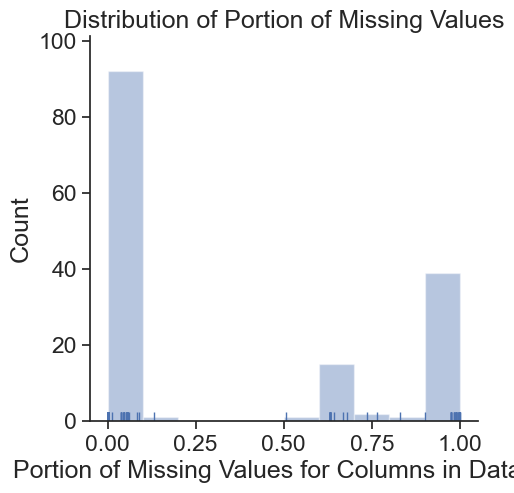

In [10]:
print('Number of Columns with under 15% missing values:', 
      missing_values_df[missing_values_df['Portion_Missing']<=0.15].shape[0])

#Plot the distribution of Portions of missing values for the columns
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(missing_values_df['Portion_Missing'], bins=10, kde=False, rug=True)
ax.set_title('Distribution of Portion of Missing Values')
ax.set_xlabel('Portion of Missing Values for Columns in Dataset')
ax.set_ylabel('Count')
sns.despine()

Upon first glance, we see that there are many columns that do have a reasonably low level of missingess: 93 columns that have less than 15% missing values.

There seems to be a small concentration of columns between 60-70% missing values. Below, we explore this and see that there are 11 columns with almost exactly the same number of missing values. Furthermore, using the issue_d column (which indicates the date the date in which the loan was issued), we found that these variables had missing values for all loans issued prior to 2015-12-01. It's possible that the Lending Club simply did not record or use this particular information from potential borrowers until a later date. We have chosen not to include these columns because:

there are many other columns that capture similar credit-related information; and

we want to keep the older loan information in the dataset, especially since we are looking at only completed loans. Removing the older samples would greatly reduce our sample size.

In [11]:
missing_grp = missing_values_df[(missing_values_df['Portion_Missing']>=0.6)&(missing_values_df['Portion_Missing']<=0.7)]
display(missing_grp)

missing_columns = missing_grp.index

earliest_date = []
for column in missing_columns:
    earliest_date.append(min(loan_df[~loan_df[column].isnull()]['issue_d'])) 

display(pd.DataFrame({'Column':missing_columns,
                      'Earliest issue_d for which column value is not null':earliest_date}))

,Missing_Count,Portion_Missing
il_util,43040,0.679604
mths_since_recent_revol_delinq,42276,0.667540
mths_since_rcnt_il,40611,0.641250
all_util,40031,0.632092
open_il_12m,40030,0.632076
open_il_24m,40030,0.632076
open_rv_24m,40030,0.632076
max_bal_bc,40030,0.632076
total_cu_tl,40030,0.632076
inq_last_12m,40030,0.632076


,Column,Earliest issue_d for which column value is not null
0,il_util,Apr-2016
1,mths_since_recent_revol_delinq,Apr-2012
2,mths_since_rcnt_il,Apr-2016
3,all_util,Apr-2016
4,open_il_12m,Apr-2016
5,open_il_24m,Apr-2016
6,open_rv_24m,Apr-2016
7,max_bal_bc,Apr-2016
8,total_cu_tl,Apr-2016
9,inq_last_12m,Apr-2016


# Data Cleaning: Column Removal and Selection

## 1. Identification Columns
- **Dropped Columns**: 
  - `id`, `member_id`, `url`
  - **Reason**: These columns contain 100% missing values and are identifiers, which are not relevant to the model.
  - `next_pymnt_d`: Also has 100% missing values because these loans are completed and no next payment date exists.



## 2. Single-Value Columns
- **Dropped Columns**:
  - `pymnt_plan`, `out_prncp`, `out_prncp_inv`, `policy_code`
  - **Reason**: These columns contain only one unique value, offering no variance or predictive power.



## 3. Columns with Large Missingness
- **Dropped Columns**:
  - `open_acc_6m`, `open_act_il`, `open_il_12m`, `open_il_24m`, `total_bal_il`, `open_rv_12m`, `open_rv_24m`, `max_bal_bc`, `inq_fi`, `total_cu_tl`, `inq_last_12m`
  - **Reason**: These columns have a large number of missing values, primarily for loans issued prior to April 2016. Retaining these would greatly reduce the dataset size, so they were excluded. Similar information is captured by other columns.
  - `il_util`, `all_util`, `mths_since_rcnt_il`: Slightly more missing data but followed the same trend and were removed for the same reasons.



## 4. Hardship-Related Variables
- **Dropped Columns**:
  - `deferral_term`, `hardship_amount`, `hardship_dpd`, `hardship_end_date`, `hardship_flag`, `hardship_last_payment_amount`, `hardship_length`, `hardship_loan_status`, `hardship_payoff_balance_amount`, `hardship_reason`, `hardship_start_date`, `hardship_status`, `hardship_type`, `orig_projected_additional_accrued_interest`, `payment_plan_start_date`
  - **Reason**: These columns pertain to borrowers on hardship plans. Since the information is coded as missing for borrowers not on hardship plans and would not be known at loan origination, they were excluded.



## 5. Borrower-Provided Text Fields
- **Dropped Columns**:
  - `desc`, `title`, `emp_title`
  - **Reason**: These are string variables with borrower-provided text. Equivalent categorical variables exist that capture similar information.



## 6. Settlement-Related Variables
- **Dropped Columns**:
  - `debt_settlement_flag`, `debt_settlement_flag_date`, `settlement_amount`, `settlement_date`, `settlement_percentage`, `settlement_status`, `settlement_term`, `recoveries`, `collection_recovery_fee`
  - **Reason**: These variables relate to specifics of loan settlement, which would not be known at loan origination and are not helpful for predictive modeling.



## 7. Lending Club Loan-Specific Information
- **Dropped Columns**:
  - `funded_amnt`, `funded_amnt_inv`, `last_pymnt_amnt`, `out_prncp`, `out_prncp_inv`, `total_pymnt`, `total_pymnt_inv`, `total_rec_int`, `total_rec_late_fee`, `total_rec_prncp`, `last_pymnt_d`, `last_credit_pull_d`, `disbursement_method`
  - **Reason**: These variables provide information about loan specifics (e.g., late fees, payments made) that would not be known at loan origination.



In [12]:
exclude = ['id', 'member_id', 'url', 'next_pymnt_d', 'pymnt_plan', 'out_prncp',
           'out_prncp_inv', 'policy_code', 'open_acc_6m', 'open_act_il', 'open_il_12m',
           'open_il_24m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
           'inq_fi', 'total_cu_tl', 'inq_last_12m', 'il_util', 'all_util','mths_since_rcnt_il',
           'num_tl_120dpd_2m', 'num_tl_30dpd', 'deferral_term', 'hardship_amount',
           'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount',
           'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount',
           'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type',
           'orig_projected_additional_accrued_interest', 'payment_plan_start_date',
           'desc', 'title', 'emp_title', 'debt_settlement_flag', 'debt_settlement_flag_date',
           'settlement_amount', 'settlement_date', 'settlement_percentage', 'settlement_status',
           'settlement_term', 'recoveries', 'collection_recovery_fee', 'funded_amnt',
           'funded_amnt_inv', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv',  'total_pymnt',
           'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp',
           'last_pymnt_d',  'last_credit_pull_d', 'disbursement_method', 'initial_list_status']

potential_features = np.setdiff1d(loan_df.columns.tolist(), exclude)

print(len(potential_features))
print(sorted(potential_features))

loan_df = loan_df[potential_features]

88
[np.str_('acc_now_delinq'), np.str_('acc_open_past_24mths'), np.str_('addr_state'), np.str_('annual_inc'), np.str_('annual_inc_joint'), np.str_('application_type'), np.str_('avg_cur_bal'), np.str_('bc_open_to_buy'), np.str_('bc_util'), np.str_('chargeoff_within_12_mths'), np.str_('collections_12_mths_ex_med'), np.str_('delinq_2yrs'), np.str_('delinq_amnt'), np.str_('dti'), np.str_('dti_joint'), np.str_('earliest_cr_line'), np.str_('emp_length'), np.str_('fico_range_high'), np.str_('fico_range_low'), np.str_('grade'), np.str_('home_ownership'), np.str_('inq_last_6mths'), np.str_('installment'), np.str_('int_rate'), np.str_('issue_d'), np.str_('last_fico_range_high'), np.str_('last_fico_range_low'), np.str_('loan_amnt'), np.str_('loan_status'), np.str_('mo_sin_old_il_acct'), np.str_('mo_sin_old_rev_tl_op'), np.str_('mo_sin_rcnt_rev_tl_op'), np.str_('mo_sin_rcnt_tl'), np.str_('mort_acc'), np.str_('mths_since_last_delinq'), np.str_('mths_since_last_major_derog'), np.str_('mths_since_las

We visualize missingness on the remaining columns and see that many of the columns are new from 2012-08-01 and later. We choose to work with data from this date and beyond since the data from prior to this date is only a small subset of our data.

In [13]:
def view_missingness_by_issue_d(df):
    missing_values_df = get_missing_values_table(df)
    earliest_date = []
    cols_with_missing_vals = missing_values_df[(missing_values_df.Portion_Missing<1) &
                                           (missing_values_df.Missing_Count >0)].index

    for column in cols_with_missing_vals:
        earliest_date.append(min(loan_df[~loan_df[column].isnull()]['issue_d'])) 

    df = pd.DataFrame({'Column':cols_with_missing_vals,
                      'Earliest issue_d for which column value is not null':earliest_date})
    
    return df.sort_values(by='Earliest issue_d for which column value is not null', ascending=False)

view_missingness_by_issue_d(loan_df).head(15)

,Column,Earliest issue_d for which column value is not null
0,sec_app_mths_since_last_major_derog,Apr-2017
7,sec_app_inq_last_6mths,Apr-2017
12,sec_app_chargeoff_within_12_mths,Apr-2017
11,sec_app_num_rev_accts,Apr-2017
10,revol_bal_joint,Apr-2017
9,sec_app_mort_acc,Apr-2017
8,sec_app_fico_range_high,Apr-2017
1,sec_app_revol_util,Apr-2017
6,sec_app_open_acc,Apr-2017
4,sec_app_earliest_cr_line,Apr-2017


Now, we see that there are columns relating to details of applications that have multiple borrowers (co-borrowers). These columns only have non-null values from issue dates of 2017-03-01 and later (or 2015-10-01 and later for 'dti_joint', 'annual_inc_joint', and 'verification_status_joint'), so we remove these columns. We remove all of these columns:

annual_inc_joint, dti_joint, revol_bal_joint, sec_app_chargeoff_within_12_mths, sec_app_collections_12_mths_ex_med, sec_app_earliest_cr_line, sec_app_inq_last_6mths, sec_app_mort_acc, sec_app_mths_since_last_major_derog, sec_app_num_rev_accts, sec_app_open_acc, sec_app_open_act_il, sec_app_revol_util, verification_status_joint]

Note that we still do have the application_type variable, which is a simple binary indicator of whether or not the application had co-borrowers.

In [14]:
coborrower_cols =  ['annual_inc_joint', 'dti_joint', 'revol_bal_joint',
                    'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med',
                    'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
                    'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts',
                    'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util',
                    'verification_status_joint']

potential_features = np.setdiff1d(loan_df.columns.tolist(), coborrower_cols)
loan_df = loan_df[potential_features]

After removing these colummns, we take another look at the remaining columns that have missing values.

In [15]:
display(view_missingness_by_issue_d(loan_df))

get_missing_values_table(loan_df).head(15)

,Column,Earliest issue_d for which column value is not null
0,sec_app_fico_range_low,Apr-2017
1,sec_app_fico_range_high,Apr-2017
17,tot_cur_bal,Apr-2013
35,num_bc_sats,Apr-2013
34,num_sats,Apr-2013
29,num_tl_90g_dpd_24m,Apr-2013
28,num_rev_tl_bal_gt_0,Apr-2013
27,num_op_rev_tl,Apr-2013
26,num_actv_bc_tl,Apr-2013
25,num_actv_rev_tl,Apr-2013


,Missing_Count,Portion_Missing
sec_app_fico_range_low,62609,0.988600
sec_app_fico_range_high,62609,0.988600
mths_since_last_record,52542,0.829641
mths_since_recent_bc_dlq,48435,0.764791
mths_since_last_major_derog,46643,0.736496
mths_since_recent_revol_delinq,42276,0.667540
mths_since_last_delinq,32047,0.506024
mths_since_recent_inq,8311,0.131231
mo_sin_old_il_acct,5212,0.082298
emp_length,3545,0.055976


We notice that many of the columns only have non-null values for issue dates of 2013-04-01 and later, so we remove the samples that have issue_dates prior to this. We see that this only reduces our sample size by a small amount.

In [16]:
print("Number of rows in dataset: {}".format (loan_df.shape[0]))

loan_df = loan_df[pd.to_datetime(loan_df['issue_d'], format='%b-%Y') >= pd.to_datetime('03/01/2013', format='%m/%d/%Y')]


print("Number of rows in dataset after removing loans issued prior to 2013-04-01: {}"\
      .format (loan_df.shape[0]))

Number of rows in dataset: 63331
Number of rows in dataset after removing loans issued prior to 2013-04-01: 57963


**Taking another look at missingness: **

In [17]:
display(view_missingness_by_issue_d(loan_df))

get_missing_values_table(loan_df).head(15)

,Column,Earliest issue_d for which column value is not null
0,sec_app_fico_range_low,Apr-2017
1,sec_app_fico_range_high,Apr-2017
9,mo_sin_old_il_acct,Apr-2013
15,dti,Apr-2013
14,revol_util,Apr-2013
13,mths_since_recent_bc,Apr-2013
12,bc_open_to_buy,Apr-2013
11,percent_bc_gt_75,Apr-2013
10,bc_util,Apr-2013
8,emp_length,Apr-2013


,Missing_Count,Portion_Missing
sec_app_fico_range_low,57241,0.987544
sec_app_fico_range_high,57241,0.987544
mths_since_last_record,47471,0.818988
mths_since_recent_bc_dlq,43545,0.751255
mths_since_last_major_derog,41638,0.718355
mths_since_recent_revol_delinq,37790,0.651968
mths_since_last_delinq,28761,0.496196
mths_since_recent_inq,5603,0.096665
emp_length,3378,0.058279
mo_sin_old_il_acct,1705,0.029415


Great! The missingness for the remaining columns is much more reasonable, but there are still a few columns with large portions of missing values. Consulting the data dictionary reveals a plausible explanation for this:

Many of the columns that still have high levels of missingness are those which measure "months since" something happened. For example, months_since_recent_bc_dlq measures "Months since most recent bankcard delinquency." Thus, it's likely that the "missing" values are not truly missing data; rather, the borrower has simply never had a bankcard delinquency. Thus, we choose to process the "month since" columns by filling the null values with the maximum observed value + 1, so that the borrowers who have never had delinquencies just have the largest value for number of months since delinquency. Since we will be using decision-tree based models, this is an appropriate approach that allows the decision tree to separate the borrowers who have had recent delinquencies from those who have not.

We also process a few other columns below:

Re-categorize emp_length so that there are fewer categories
Cast revol_util to float
Change loan_grade and grade values to numerical rankings (i.e., an ordinal variable with the lowest grade/subgrade indicating the least-risky loans)
credit_line_age and earliest_cr_line
int_rate
zip_code
fully_paid and loan_status

In [18]:
print('emp_length value counts: \n{}\n'.format(loan_df.emp_length.value_counts()))

emp_length value counts: 
emp_length
10+ years    19323
2 years       5167
< 1 year      4683
3 years       4586
1 year        3757
5 years       3518
4 years       3437
8 years       2689
6 years       2648
7 years       2478
9 years       2299
Name: count, dtype: int64



In [19]:
def process_emp_length(df):
    df_new = df.copy()
    #0-1 years inclues: null, None, < 1 year, 1 year
    df_new['emp_length'] = df_new['emp_length'].fillna('0-1 years')
    df_new['emp_length'] = np.where(df_new['emp_length'].isin([np.nan,None,'< 1 year','1 year']),
                                     '0-1 years',df_new['emp_length'])
    #2-4 years inclues: 2 years, 3 years, 4 years
    df_new['emp_length'] = np.where(df_new['emp_length'].isin(['2 years','3 years','4 years']),
                                     '2-4 years',df_new['emp_length'])
    
    #5-9 years inclues: 5 years, 6 years, 7 years, 8 years, 9 years
    df_new['emp_length'] = np.where(df_new['emp_length'].isin(['5 years','6 years','7 years','8 years','9 years']),
                                     '5-9 years',df_new['emp_length'])
    #10+ years includes 10+ years (no change)
    return df_new

def process_revol_util(df):
    df_new = df.copy()
    
    df_new['revol_util'] = df_new['revol_util'].fillna(-100)
    df_new['revol_util'] = df_new['revol_util'].apply(lambda x: float(str(x).split('%')[0])/100)
    df_new['revol_util'] = np.where(df_new['revol_util']==-1.0,np.nan,df_new['revol_util'])
    
    return df_new

def process_month_since_cols(df):
    df_new = df.copy()

    mo_since_cols = ['mo_sin_old_il_acct','mths_since_last_delinq','mths_since_last_major_derog',
                     'mths_since_last_record','mths_since_recent_bc_dlq','mths_since_recent_inq',
                     'mths_since_recent_revol_delinq','mo_sin_old_rev_tl_op','mths_since_recent_bc',
                     'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl']

    for col in mo_since_cols:
        df_new[col].fillna(df_new[col].max()+1, inplace=True)
    
    return df_new

def process_loan_grades(df):
    df_new = df.copy()
    
    # turn sub_grade into ordinal mapping
    sorted_subgrades = sorted(df.sub_grade.unique())
    subgrade_dict = dict(zip(sorted_subgrades, range(len(sorted_subgrades))))
    df_new['sub_grade'] = df_new['sub_grade'].map(subgrade_dict)
    
    # turn grade into ordinal mapping
    sorted_grades = sorted(df.grade.unique())
    grade_dict = dict(zip(sorted_grades, range(len(sorted_grades))))
    df_new['grade'] = df_new['grade'].map(grade_dict)
    return df_new
    
    
def process_loan_cols(df):
    df_processed = process_emp_length(df)
    df_processed = process_revol_util(df_processed)
    df_processed = process_month_since_cols(df_processed)
    df_processed = process_loan_grades(df_processed)
    
    #add credit_line_age
    df_processed['issue_d'] = pd.to_datetime(df_processed['issue_d'], format='%b-%Y')
    df_processed['earliest_cr_line'] = pd.to_datetime(df_processed['earliest_cr_line'])
    df_processed['credit_line_age'] = df_processed['issue_d'] - pd.to_datetime(df_processed['earliest_cr_line'])
    df_processed = df_processed.drop(columns='earliest_cr_line')

    #process int_rate, zip_code, credit_line_age
    df_processed['int_rate'] = df_processed['int_rate'].apply(lambda x: float(str(x).split('%')[0])/100)
    df_processed['zip_code'] = df_processed['zip_code'].apply(lambda x: x[:3])
    df_processed['credit_line_age'] = df_processed['credit_line_age'].apply(lambda x: x.days)
    
    # generate new column for outcome variable ('fully_paid'); drop 'loan_status'
    df_processed['fully_paid'] = df_processed['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
    df_processed = df_processed.drop(columns='loan_status')
    
    return df_processed

loan_df = process_loan_cols(loan_df)

Missing Values: Imputation for Continuous Columns
We will fill the remaining columns' missing values using linear regression model-based imputation. First, we verify that all of the remaining columns are continuous float-64 variables for which this model imputation is appropriate.

Then, we use pd.get_dummies() to get dummy-variables for the necessary categorical columns. This is an important step which should be done prior to model-based imputation

Finally, we proceed with our imputation.

In [20]:
missing_data = get_missing_values_table(loan_df)
display(missing_data[missing_data.Missing_Count!=0])
missing_cols = missing_data[missing_data.Missing_Count!=0].index

print("datatypes of the columns that still have missing values: ")
print(loan_df[missing_cols].dtypes.unique().tolist())

,Missing_Count,Portion_Missing
sec_app_fico_range_high,57241,0.987544
sec_app_fico_range_low,57241,0.987544
bc_util,633,0.010921
percent_bc_gt_75,605,0.010438
bc_open_to_buy,590,0.010179
revol_util,34,0.000587
dti,10,0.000173
pct_tl_nvr_dlq,5,0.000086


datatypes of the columns that still have missing values: 
[dtype('float64')]


Before performing imputation, we need to process some of the categorical variables using pd.get_dummies. We do so below.

In [21]:
#Rerun Types
types_df = pd.DataFrame(loan_df.dtypes,columns=['Types'])
display(types_df[types_df['Types']!='float64'].sort_values(by='Types'))


object_vars=loan_df.select_dtypes(include='object').columns.tolist()
object_vars = np.setdiff1d(object_vars,['addr_state', 'zip_code'])
print(object_vars)

#Dummy encoding
loan_df = pd.get_dummies(loan_df,columns=object_vars,drop_first=True) 

,Types
grade,int64
issue_d,datetime64[ns]
sub_grade,int64
credit_line_age,int64
fully_paid,int64
addr_state,object
application_type,object
emp_length,object
home_ownership,object
purpose,object


['application_type' 'emp_length' 'home_ownership' 'purpose' 'term'
 'verification_status']


In [22]:
#columns where imputation is neededpd.
missing_cols = loan_df.columns[loan_df.isnull().any()].tolist()

#verify they're all continuous dtypes appropriate for linear regression imputation
loan_df[missing_cols].dtypes.unique() # all float64

array([dtype('float64')], dtype=object)

Performming Linear Regression Model-Based Imputation

In [23]:
def impute_missing_continuous(df, missing_columns, cols_to_exclude):
    clean_df = df.copy()
    
    for column in missing_columns:
        types_df = pd.DataFrame(df.dtypes, columns=['Types'])
        
        # Remove response variable
        impute_train = clean_df[~clean_df[column].isnull()].drop(columns=cols_to_exclude).sample(frac=0.1, random_state=12)
        
        # Split target
        X_impute_train = impute_train.drop(columns=column)
        Y_impute_train = impute_train[column]
        
        # Mean Imputation for current nulls for columns that did not get imputed yet
        X_impute_train = X_impute_train.fillna(X_impute_train.mean())
        
        # Train LinearRegression
        impute_ols = LinearRegression(fit_intercept=True)
        impute_ols.fit(X_impute_train, Y_impute_train)
        
        # Generate new temp column with model predictions
        # Only replace rows where the value is null with the predicted value
        exclude_cols = cols_to_exclude + [column]
        predictions = clean_df.drop(columns=exclude_cols)
        
        # Mean Imputation for current nulls for columns that did not get imputed yet
        predictions = predictions.fillna(predictions.mean())
        clean_df['temp'] = impute_ols.predict(predictions)
        
        clean_df[column] = np.where(clean_df[column].isnull(), 
                                  clean_df['temp'], 
                                  clean_df[column])
        clean_df = clean_df.drop(columns='temp')
    
    return clean_df

# Call the function
clean_df = impute_missing_continuous(
    loan_df, 
    missing_columns=missing_cols, 
    cols_to_exclude=['fully_paid', 'issue_d', 'zip_code', 'addr_state']
)

In [24]:
clean_df.isnull().values.any()

np.False_

In [25]:
print("float64 columns: ")
print(clean_df.dtypes[clean_df.dtypes=='float64'].index.tolist())

print("\nnon-float64 columns: ")
print(clean_df.dtypes[clean_df.dtypes!='float64'])

print("\n\nVisualizing unique values for non-float64 variables (except for zip_code and issue_d)")
for col in clean_df.dtypes[clean_df.dtypes!='float64'].index.tolist():
    if not col in['issue_d', 'zip_code']:
        print("\n", col)
        print(clean_df[col].unique())

float64 columns: 
['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti', 'fico_range_high', 'fico_range_low', 'inq_last_6mths', 'installment', 'int_rate', 'last_fico_range_high', 'last_fico_range_low', 'loan_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'sec_app_fico_range_h

In [26]:
clean_df.to_pickle('clean_df_5pct_subset.pkl')

## Data Clean on Entire Dataset

In [27]:
df = pd.read_csv('accepted_2007_to_2018Q3.csv.gz')
loan_df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]

exclude = ['id', 'member_id', 'url', 'next_pymnt_d', 'pymnt_plan', 'out_prncp',
           'out_prncp_inv', 'policy_code', 'open_acc_6m', 'open_act_il', 'open_il_12m',
           'open_il_24m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
           'inq_fi', 'total_cu_tl', 'inq_last_12m', 'il_util', 'all_util','mths_since_rcnt_il',
           'num_tl_120dpd_2m', 'num_tl_30dpd', 'deferral_term', 'hardship_amount',
           'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount',
           'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount',
           'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type',
           'orig_projected_additional_accrued_interest', 'payment_plan_start_date',
           'desc', 'title', 'emp_title', 'debt_settlement_flag', 'debt_settlement_flag_date',
           'settlement_amount', 'settlement_date', 'settlement_percentage', 'settlement_status',
           'settlement_term', 'recoveries', 'collection_recovery_fee', 'funded_amnt',
           'funded_amnt_inv', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv',  'total_pymnt',
           'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp',
           'last_pymnt_d',  'last_credit_pull_d', 'disbursement_method', 'initial_list_status',
           'annual_inc_joint', 'dti_joint', 'revol_bal_joint','sec_app_chargeoff_within_12_mths',
           'sec_app_collections_12_mths_ex_med','sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
           'sec_app_mort_acc','sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts',
           'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util',
           'verification_status_joint']

potential_features = np.setdiff1d(loan_df.columns.tolist(), exclude)
loan_df = loan_df[potential_features]

loan_df = loan_df[pd.to_datetime(loan_df['issue_d'], format='%b-%Y') >= pd.to_datetime('03/01/2013', format='%m/%d/%Y')]

loan_df = process_loan_cols(loan_df)

object_vars = loan_df.select_dtypes(include='object').columns.tolist()
vars_for_dummies = np.setdiff1d(object_vars,['addr_state', 'zip_code'])

tmp_df = loan_df[vars_for_dummies]
loan_df = pd.get_dummies(loan_df,columns=vars_for_dummies,drop_first=True) 

missing_cols = loan_df.columns[loan_df.isnull().any()].tolist()

clean_df = impute_missing_continuous(loan_df, missing_columns=missing_cols,
                                     cols_to_exclude=['fully_paid','issue_d', 'zip_code', 'addr_state'])

for col in vars_for_dummies:
    clean_df[col] = tmp_df[col]
    
print(sorted(clean_df.columns.tolist()))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', np.str_('application_type'), 'application_type_Joint App', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'credit_line_age', 'delinq_2yrs', 'delinq_amnt', 'dti', np.str_('emp_length'), 'emp_length_10+ years', 'emp_length_2-4 years', 'emp_length_5-9 years', 'fico_range_high', 'fico_range_low', 'fully_paid', 'grade', np.str_('home_ownership'), 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OWN', 'home_ownership_RENT', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_fico_range_high', 'last_fico_range_low', 'loan_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',

In [28]:
print(clean_df.shape)

(1159032, 98)


In [29]:
clean_df.isnull().values.any()

np.False_

In [30]:
clean_df.to_pickle('clean_df_for_eda.pkl')

In [31]:
clean_df.groupby(['fully_paid']).size()

fully_paid
0    238253
1    920779
dtype: int64

## Subset Data

In [32]:
shorten_df = pd.read_pickle('clean_df_for_eda.pkl')

In [33]:
# Subset while maintaining distribution.

subset_size = 200000

proportions = shorten_df['fully_paid'].value_counts(normalize=True)
sample_sizes = (proportions * subset_size).round().astype(int)

shorten_df = (
    shorten_df.groupby('fully_paid', group_keys=False)
    .apply(lambda group: group.sample(n=sample_sizes[group.name], random_state=42))
)

In [34]:
def CapOutliers(df,columns_to_cap):
    for column in columns_to_cap:
        Q1 = df[column].quantile(.25)
        Q3 = df[column].quantile(.75)
        IQR = Q3 - Q1
        upper = (Q3 + 1.5 * IQR)
        lower = (Q1 - 1.5 * IQR)

        df[column] = np.where(df[column] > upper,upper,np.where(df[column] < lower,lower,df[column]))

        return df

In [35]:
columns_to_cap = ['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti', 'inq_last_6mths', 'installment', 'int_rate', 'loan_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_rev_hi_lim']

loan_df = CapOutliers(shorten_df,columns_to_cap)

In [36]:
df_encoded = pd.get_dummies(loan_df,columns=['application_type','emp_length','home_ownership','purpose','term','verification_status','addr_state'])

In [37]:
X = df_encoded.drop(['fully_paid','zip_code','issue_d','int_rate','installment','grade','sub_grade'],axis=1)
y = df_encoded['fully_paid']

# XGBoost Model

In [91]:
# Import Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import PartialDependenceDisplay
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [92]:
# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [93]:
# Step 2: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
# Step 3: Train an initial XGBoost model with overfitting settings
initial_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=2000,  # Very high number of trees
    learning_rate=0.01,  # Low learning rate
    max_depth=15,  # Deep trees to overfit
    min_child_weight=1,  # No constraints on splits
    gamma=0,  # No regularization
    subsample=1,  # Use all data
    colsample_bytree=1,  # Use all features
    Lambda=0,  # Remove L2 regularization
    eval_metric='logloss'
)
initial_model.fit(X_train_scaled, y_train)

XGBClassifier(Lambda=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, ...)

In [96]:
# Step 4: Feature Selection
selection = SelectFromModel(initial_model, prefit=True, threshold='mean')
X_train_selected = selection.transform(X_train_scaled)
X_test_selected = selection.transform(X_test_scaled)


In [97]:
# Step 5: Hyperparemeter Tuning
param_grid = {
    'eval_metric': ['auc'],
    'n_estimators': [1000, 2000], 
    'learning_rate': [0.01],
    'max_depth': [15],  
    'min_child_weight': [1],
    'gamma': [0],
    'subsample': [1],
    'colsample_bytree': [1],
    'lambda': [0]  
}

model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1', 
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_selected, y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1], 'eval_metric': ['auc'],
                         'gamma': [0], 'lambda': [0], 'learning_rate': [0.01],
                         'max_depth': [15], 'min_child_weight': [1],
                         'n_estimators': [1000, 2000], 'subsample': [1]},
             scoring='f1', verbose=1)

In [98]:
# Step 6: Eval best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]

xgboost_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, y_pred_proba),
    'best_params': grid_search.best_params_
}

print("Evaluation Metrics:")
for metric, value in xgboost_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}" if isinstance(value, float) else f"{metric.capitalize()}: {value}")


Evaluation Metrics:
Accuracy: 0.9066
Precision: 0.9447
Recall: 0.9372
F1: 0.9410
Roc_auc: 0.9476
Best_params: {'colsample_bytree': 1, 'eval_metric': 'auc', 'gamma': 0, 'lambda': 0, 'learning_rate': 0.01, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 1000, 'subsample': 1}


Index(['delinq_2yrs', 'last_fico_range_high', 'loan_amnt', 'pub_rec',
       'pub_rec_bankruptcies', 'sec_app_fico_range_high', 'tax_liens',
       'application_type_Joint App', 'purpose_major_purchase',
       'purpose_moving', 'purpose_small_business', 'term_ 60 months',
       'emp_length_0-1 years', 'verification_status_Not Verified',
       'addr_state_AZ', 'addr_state_CT', 'addr_state_FL', 'addr_state_GA',
       'addr_state_IN', 'addr_state_LA', 'addr_state_MD', 'addr_state_MI',
       'addr_state_MT', 'addr_state_NC', 'addr_state_NM', 'addr_state_NY',
       'addr_state_SC', 'addr_state_VA', 'addr_state_WI', 'addr_state_WV'],
      dtype='object')


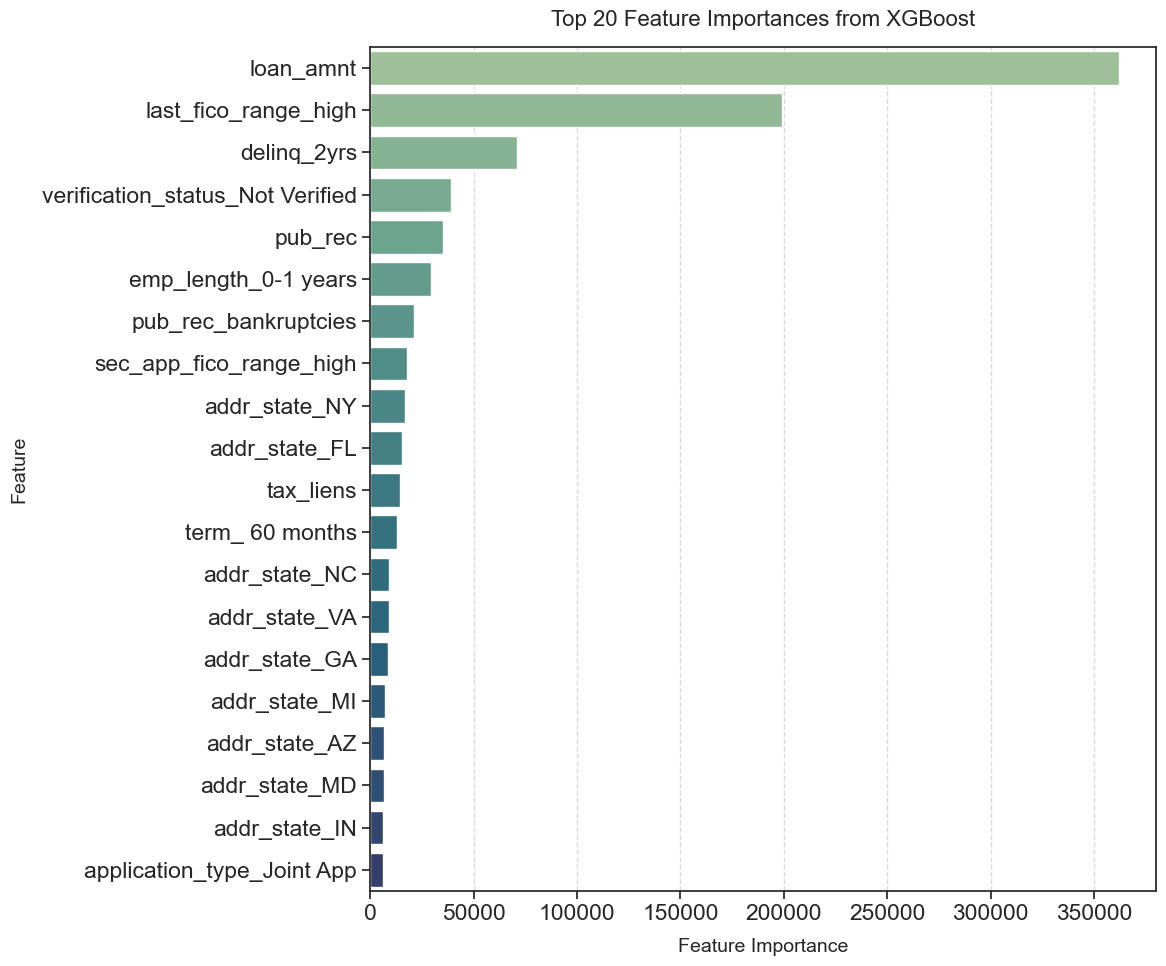

In [99]:
# Extract selected features
selected_features = X.columns[selection.get_support()]
print(selected_features)  

# Extract feature importance
feature_importance = best_model.get_booster().get_score(importance_type='weight')

# Map feature indices to feature names
feature_importance_named = {
    selected_features[int(k[1:])]: v for k, v in feature_importance.items()
}

# Convert to DataFrame
importance_df = pd.DataFrame(
    list(feature_importance_named.items()), columns=["Feature", "Importance"]
).sort_values(by="Importance", ascending=False)
importance_df = importance_df[importance_df["Importance"] > 0]

# Feature Importance Plot
plt.figure(figsize=(12, len(importance_df.head(20)) * 0.5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=importance_df.head(20), 
    palette="crest"
)
plt.title("Top 20 Feature Importances from XGBoost", fontsize=16, pad=15)
plt.xlabel("Feature Importance", fontsize=14, labelpad=10)
plt.ylabel("Feature", fontsize=14, labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Skipping sec_app_fico_range_high due to error: percentiles are too close to each other, unable to build the grid. Please choose percentiles that are further apart.


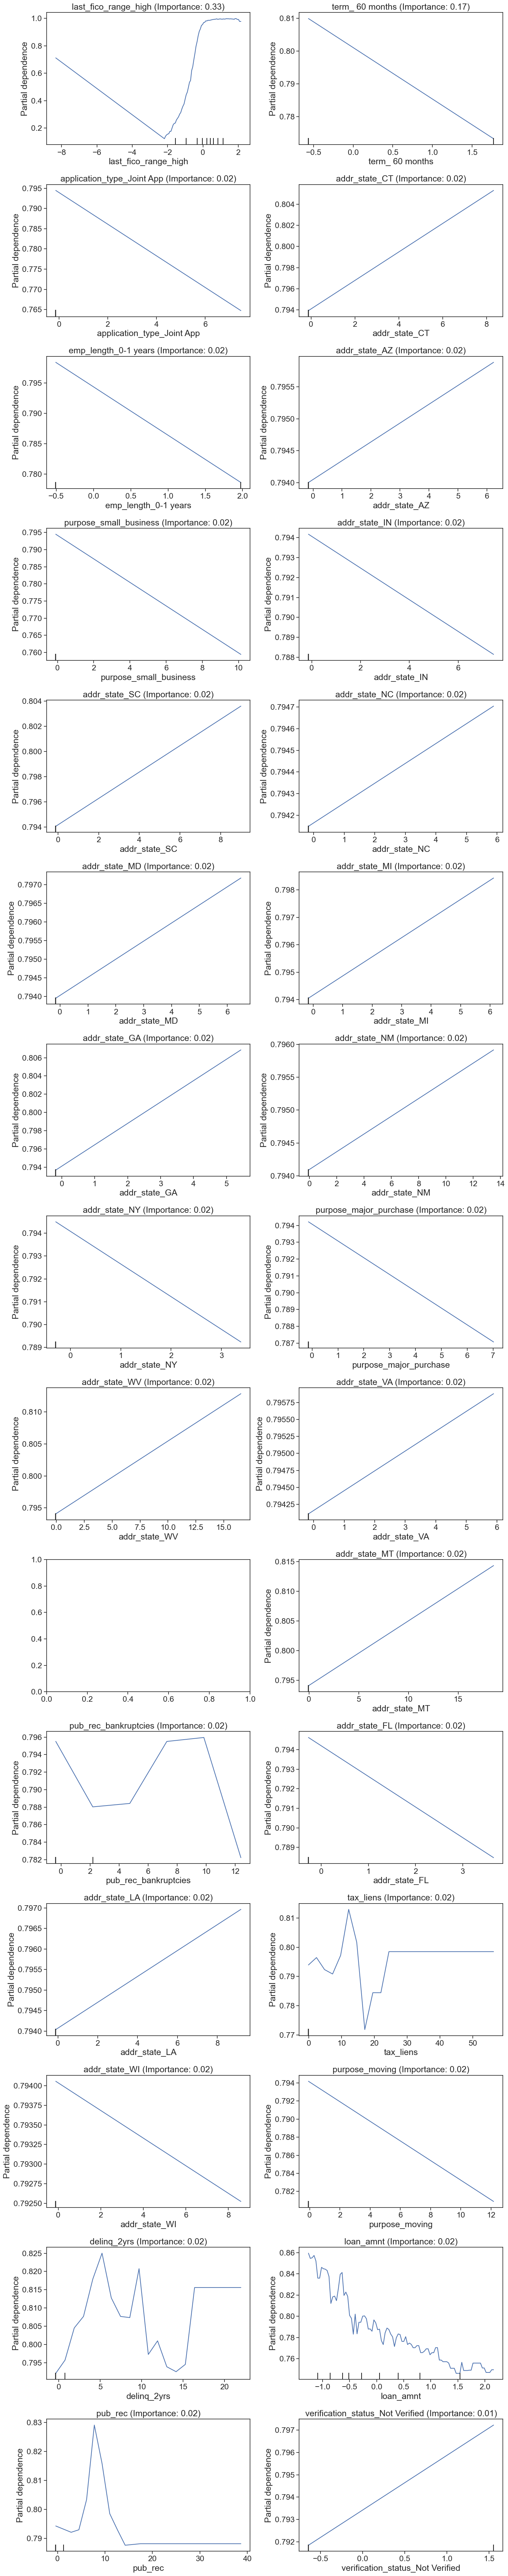

In [ ]:
from math import ceil
from sklearn.feature_selection import VarianceThreshold

# Step 1: Filter Low-Variance Features
variance_threshold = 1e-4  # Set threshold for variance filtering
var_selector = VarianceThreshold(threshold=variance_threshold)
X_test_filtered = var_selector.fit_transform(X_test_selected)
filtered_features = np.array(selected_feature_names)[var_selector.get_support()]

# Filter importance_df to include only high-variance features
importance_df_filtered = importance_df[importance_df["Feature"].isin(filtered_features)]

# Step 2: Sort Features by Importance
importance_df_sorted = importance_df_filtered.sort_values(by="Importance", ascending=False)
sorted_features = importance_df_sorted["Feature"].tolist()

# Step 3: Set Up Subplots for Partial Dependence Plots
num_features = len(sorted_features)
num_cols = 2  # Adjust the number of columns
num_rows = ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Step 4: Plot PDPs with Feature Importance Annotation
for i, feature in enumerate(sorted_features):
    try:
        PartialDependenceDisplay.from_estimator(
            best_model,
            X_test_selected,  # Transformed test set
            features=[selected_feature_names.index(feature)],  # Feature index
            feature_names=selected_feature_names,  # Feature names
            ax=axes[i]
        )
        importance = importance_df_sorted.loc[importance_df_sorted["Feature"] == feature, "Importance"].values[0]
        axes[i].set_title(f"{feature} (Importance: {importance:.2f})")
    except ValueError as e:
        print(f"Skipping {feature} due to error: {e}")

# Step 5: Hide Unused Subplots
for j in range(num_features, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


## Logistic Regression

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve



In [50]:
# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [51]:
# Step 2: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Step 3: Define Hyperparameter Grid
lr_params = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],        # L2 regularization
    'solver': ['lbfgs']       # Optimization solver
}

In [53]:
# Step 4: Hyperparameter Tuning with GridSearchCV
log_reg = LogisticRegression(random_state=42, max_iter=500)
grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=lr_params,
    scoring='f1',  # Optimize for F1-score
    cv=3,          # 3-fold cross-validation
    verbose=1,
    n_jobs=-1      # Use all available CPU cores
)
grid_search_lr.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1', verbose=1)

In [54]:
# Step 5: Get the Best Model and Parameters
best_log_reg = grid_search_lr.best_estimator_
best_params = grid_search_lr.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [55]:
# Step 6: Make Predictions
y_pred = best_log_reg.predict(X_test_scaled)
y_pred_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]

In [56]:
# Step 7: Compute Evaluation Metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Create the dictionary
logistic_metrics = {
    "Accuracy": accuracy,
    "Precision (Class 1)": precision,
    "Recall (Class 1)": recall,
    "F1-Score (Class 1)": f1,
    "AUC (ROC)": roc_auc
}

print("\nLogistic Regression Metrics After Hyperparameter Tuning:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")



Logistic Regression Metrics After Hyperparameter Tuning:
Accuracy: 0.9099
Precision: 0.9382
Recall: 0.9491
F1-Score: 0.9436
ROC AUC Score: 0.9518


In [57]:
# Step 8: Generate Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      8222
           1       0.94      0.95      0.94     31778

    accuracy                           0.91     40000
   macro avg       0.87      0.85      0.86     40000
weighted avg       0.91      0.91      0.91     40000



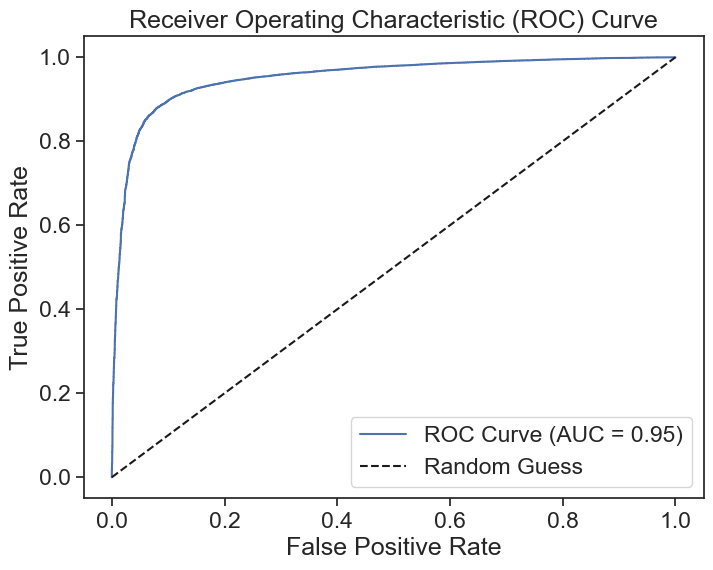

In [58]:
# Step 9: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


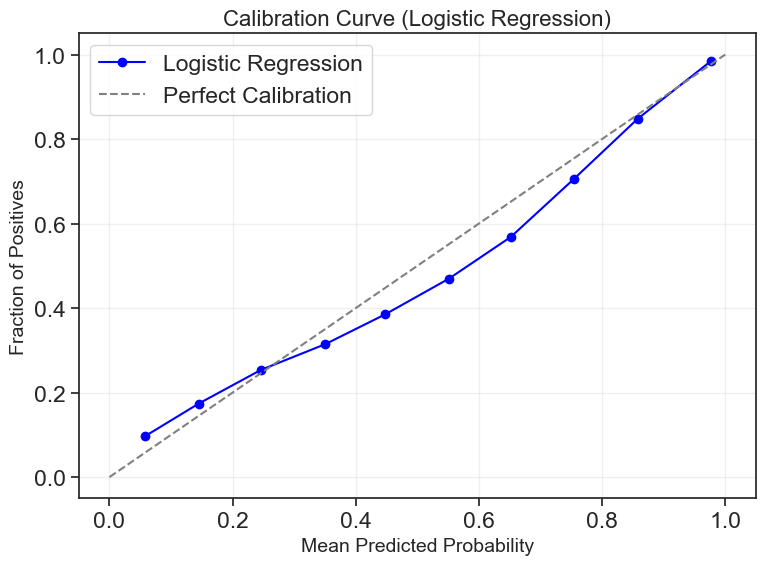

In [59]:
# Step 10: Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10, strategy='uniform')

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label="Logistic Regression", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfect Calibration")
plt.title("Calibration Curve (Logistic Regression)", fontsize=16)
plt.xlabel("Mean Predicted Probability", fontsize=14)
plt.ylabel("Fraction of Positives", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

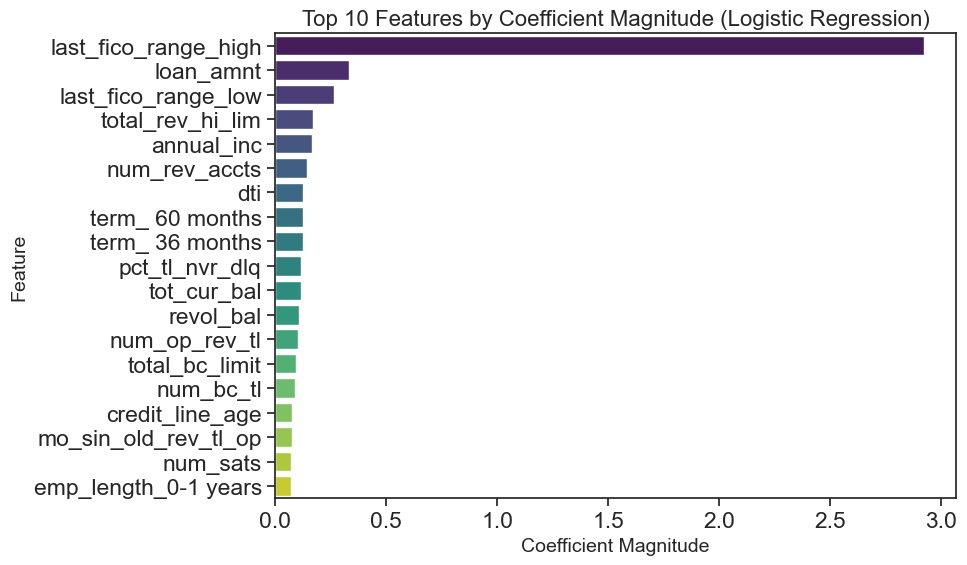

In [60]:
# Coefficient-based feature importance
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": best_log_reg.coef_[0],
    "Absolute Importance": abs(best_log_reg.coef_[0])
}).sort_values(by="Absolute Importance", ascending=False)

# Visualize top features
plt.figure(figsize=(10, 6))
sns.barplot(x="Absolute Importance", y="Feature", data=coefficients.head(20), palette="viridis")
plt.title("Top 10 Features by Coefficient Magnitude (Logistic Regression)", fontsize=16)
plt.xlabel("Coefficient Magnitude", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()


## Compare Results

In [108]:
# Create comparison DataFrame with harmonized keys
comparison = pd.DataFrame([
    {"Metric": "Accuracy", 
     "Logistic Regression": logistic_metrics["Accuracy"], 
     "XGBoost": xgboost_metrics["accuracy"]},
    {"Metric": "AUC (ROC)", 
     "Logistic Regression": logistic_metrics["AUC (ROC)"], 
     "XGBoost": xgboost_metrics["roc_auc"]},
    {"Metric": "Precision (Class 1)", 
     "Logistic Regression": logistic_metrics["Precision (Class 1)"], 
     "XGBoost": xgboost_metrics["precision"]},
    {"Metric": "Recall (Class 1)", 
     "Logistic Regression": logistic_metrics["Recall (Class 1)"], 
     "XGBoost": xgboost_metrics["recall"]},
    {"Metric": "F1-Score (Class 1)", 
     "Logistic Regression": logistic_metrics["F1-Score (Class 1)"], 
     "XGBoost": xgboost_metrics["f1"]}
])

# Display the DataFrame
print("Performance Summary: Logistic Regression vs. XGBoost")
print(comparison)


Performance Summary: Logistic Regression vs. XGBoost
                Metric  Logistic Regression   XGBoost
0             Accuracy             0.909925  0.906575
1            AUC (ROC)             0.951824  0.947574
2  Precision (Class 1)             0.938194  0.944742
3     Recall (Class 1)             0.949147  0.937221
4   F1-Score (Class 1)             0.943639  0.940966
